T SNE 

In [8]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA 
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE 

In [10]:
from sklearn import datasets
digits = datasets.load_digits()

x = digits.data[:500]
y = digits.target[:500]

In [13]:
x.shape

(500, 64)

In [14]:
tsne = TSNE(n_components=2, random_state=0)

In [15]:
x_2d = tsne.fit_transform(x)

In [16]:
df=pd.DataFrame(x_2d, columns=['x','y'])

In [17]:
df['digits']=y

In [18]:
df

,x,y,digits
0,21.128862,-27.168310,0
1,4.987787,19.583260,1
2,-2.877124,15.290366,2
3,-8.521600,-21.091736,3
4,15.439630,23.603703,4
...,...,...,...
495,-11.408027,-5.706061,5
496,12.562231,22.834518,4
497,12.427700,21.450829,4
498,-16.493898,10.183492,7


In [20]:
import seaborn as sns
%matplotlib inline

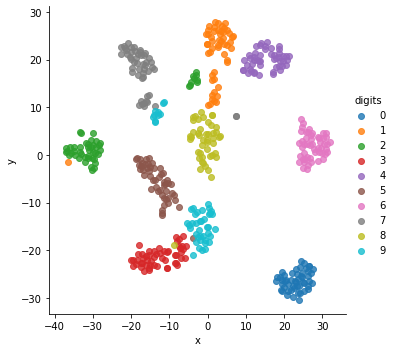

In [23]:
sns.lmplot('x','y', data=df, fit_reg=False, hue='digits')

t sne on wine data 

In [25]:
wine=pd.read_csv('winequality-white.csv', delimiter=';')

In [26]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [38]:
x1=scale(wine.iloc[:,:-1])

In [39]:
x1

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
        -1.24692128e+00, -3.49184257e-01, -1.39315246e+00],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
         7.40028640e-01,  1.34184656e-03, -8.24275678e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
         4.75101984e-01, -4.36815783e-01, -3.36667007e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -1.31315295e+00, -2.61552731e-01, -9.05543789e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
         1.00495530e+00, -9.62604939e-01,  1.85757201e+00],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
         4.75101984e-01, -1.48839409e+00,  1.04489089e+00]])

In [40]:
x_2d=tsne.fit_transform(x1)

In [41]:
df=pd.DataFrame(x_2d, columns=['x','y'])

In [42]:
df['quality'] = wine['quality']

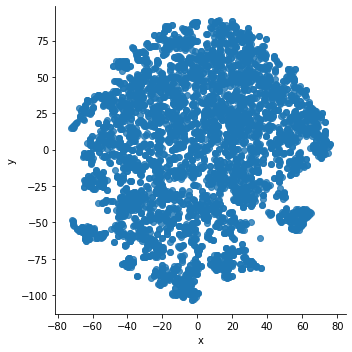

In [43]:
sns.lmplot('x','y', data=df, fit_reg=False)

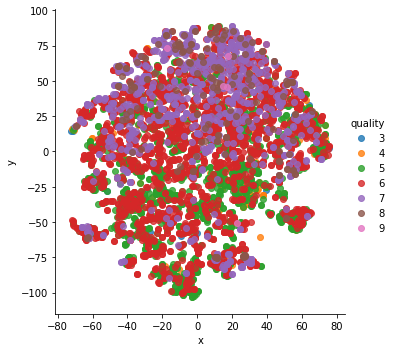

In [44]:
sns.lmplot('x','y', data=df, fit_reg=False, hue='quality')

In [45]:
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

PCA

In [46]:
df=pd.read_csv('Existing Base.csv')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10155 entries, 0 to 10154
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           10155 non-null  int64  
 1   children                         10155 non-null  object 
 2   age_band                         10155 non-null  object 
 3   status                           10155 non-null  object 
 4   occupation                       10155 non-null  object 
 5   occupation_partner               10155 non-null  object 
 6   home_status                      10155 non-null  object 
 7   family_income                    10155 non-null  object 
 8   self_employed                    10155 non-null  object 
 9   self_employed_partner            10155 non-null  object 
 10  year_last_moved                  10155 non-null  int64  
 11  TVarea                           10155 non-null  object 
 12  post_code         

In [51]:
df=df[['Average Credit Card Transaction','Balance Transfer', 'Term Deposit', 'Life Insurance', 'Medical Insurance', 'Average A/C Balance','Personal Loan', 'Investment in Mutual Fund', 'Investment Tax Saving Bond','Home Loan', 'Online Purchase Amount', 'Investment in Commudity', 'Investment in Equity', 'Investment in Derivative', 'Portfolio Balance' ]]

In [52]:
df.corr()

,Average Credit Card Transaction,Balance Transfer,Term Deposit,Life Insurance,Medical Insurance,Average A/C Balance,Personal Loan,Investment in Mutual Fund,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
Average Credit Card Transaction,1.000000,0.123855,0.323462,0.145041,0.405090,0.172240,0.087289,0.150667,0.133126,0.087695,0.132518,0.497025,0.205289,0.228141,0.335674
Balance Transfer,0.123855,1.000000,0.229457,0.564538,0.162085,0.358938,0.351499,0.454602,0.166496,0.153097,0.112012,0.739791,0.463556,0.581039,0.639400
Term Deposit,0.323462,0.229457,1.000000,0.274691,0.506367,0.274027,0.146755,0.208948,0.176975,0.170584,0.099455,0.620256,0.266908,0.354304,0.454740
Life Insurance,0.145041,0.564538,0.274691,1.000000,0.238435,0.514339,0.380563,0.544439,0.263675,0.279959,0.128785,0.803326,0.564287,0.839266,0.787311
Medical Insurance,0.405090,0.162085,0.506367,0.238435,1.000000,0.264615,0.105134,0.209651,0.201057,0.136310,0.149651,0.548282,0.269922,0.392548,0.441631
Average A/C Balance,0.172240,0.358938,0.274027,0.514339,0.264615,1.000000,0.219801,0.448270,0.307552,0.367590,0.162821,0.517832,0.600278,0.657742,0.616051
Personal Loan,0.087289,0.351499,0.146755,0.380563,0.105134,0.219801,1.000000,0.379615,0.233020,0.128062,0.073292,0.377170,0.676053,0.687417,0.598919
Investment in Mutual Fund,0.150667,0.454602,0.208948,0.544439,0.209651,0.448270,0.379615,1.000000,0.271580,0.261562,0.115087,0.536715,0.693435,0.761125,0.695337
Investment Tax Saving Bond,0.133126,0.166496,0.176975,0.263675,0.201057,0.307552,0.233020,0.271580,1.000000,0.261626,0.211596,0.289110,0.446271,0.407148,0.395889
Home Loan,0.087695,0.153097,0.170584,0.279959,0.136310,0.367590,0.128062,0.261562,0.261626,1.000000,0.101066,0.268989,0.348181,0.335651,0.326663


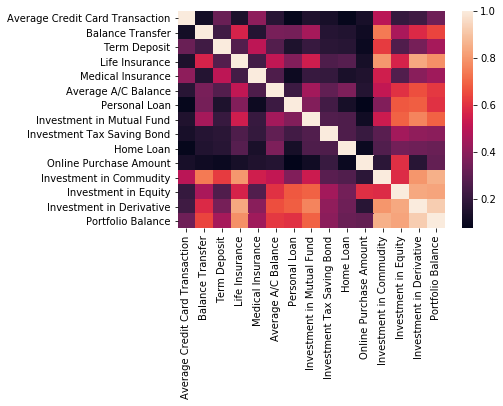

In [53]:
sns.heatmap(df.corr())

In [55]:
df.shape

(10155, 15)

In [56]:
x=df.copy()

In [59]:
pca = PCA(n_components=15)

In [61]:
pca.fit(x)

PCA(n_components=15)

In [62]:
pca.components_

array([[ 8.57915367e-02,  3.13783209e-01,  1.30285683e-01,
         4.57745246e-01,  7.14276664e-02,  1.56800515e-01,
         2.96026703e-01,  2.56426329e-01,  2.71452091e-02,
         1.80698655e-02,  1.54165617e-01,  2.11806374e-01,
         1.51439560e-01,  2.10928598e-01,  5.89476957e-01],
       [ 7.37513373e-02, -1.31087951e-01,  2.17275923e-02,
        -1.78293501e-01,  3.91851961e-02,  7.59327966e-03,
        -1.45557720e-01, -6.85876590e-02,  1.80555974e-02,
         2.66187237e-03,  9.46273313e-01, -3.49430203e-02,
         1.26740125e-01, -5.46009212e-02,  3.99995813e-02],
       [-1.12663994e-01, -1.87144867e-01, -1.65603695e-01,
        -3.35567967e-01, -8.41177972e-02, -1.09539714e-01,
         8.59643929e-01,  6.15619486e-03,  9.15816163e-03,
        -9.22452110e-03,  3.86560800e-02, -1.77019157e-01,
         1.32474566e-01,  5.76223213e-02,  1.68511529e-02],
       [ 5.32413170e-01, -3.58882431e-01,  5.68567382e-01,
        -3.12617134e-01,  2.82705411e-01,  4.38639653

In [63]:
pca.components_.shape

(15, 15)

In [65]:
var=pca.explained_variance_ratio_
var

array([5.33412283e-01, 1.34555989e-01, 9.09797606e-02, 6.51591635e-02,
       5.55652406e-02, 4.24157150e-02, 3.08352236e-02, 2.24961123e-02,
       1.21348837e-02, 8.65427684e-03, 2.42711231e-03, 1.36423913e-03,
       1.15309636e-10, 1.05710247e-10, 1.00508803e-10])

In [68]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_ , decimals=4)*100)

In [69]:
var1

array([ 53.34,  66.8 ,  75.9 ,  82.42,  87.98,  92.22,  95.3 ,  97.55,
        98.76,  99.63,  99.87, 100.01, 100.01, 100.01, 100.01])

In [72]:
pca=PCA(n_components=11)

In [73]:
pca.fit(x)

PCA(n_components=11)

In [74]:
pca.components_.shape

(11, 15)

In [75]:
x1=pd.DataFrame(pca.transform(x))

In [79]:
#this new df can be used in modelling process
x1

,0,1,2,3,4,5,6,7,8,9,10
0,44.664678,-24.833216,-60.969381,12.456754,82.699032,16.975207,-117.273997,4.591509,41.197474,4.204353,-16.316471
1,-95.706359,-14.830345,-5.586863,-42.826575,50.317082,-17.343404,-2.442911,5.506218,-0.368996,-2.184968,1.140488
2,213.557086,-70.056403,-137.160246,-99.779193,-27.482453,-81.157304,5.142516,-100.756661,31.542901,24.151742,12.348760
3,-140.393937,-7.784232,10.647294,-28.181972,-23.117055,24.659953,3.702517,-3.885265,43.012486,46.481986,1.894316
4,206.623855,-14.058794,-51.506288,-0.726596,-79.478847,112.462350,-59.112371,51.433511,-25.159117,-10.460572,2.052618
...,...,...,...,...,...,...,...,...,...,...,...
10150,-120.739571,-7.091631,17.216870,-19.202629,-15.405755,-16.529606,-1.390133,12.169215,-0.082221,5.374272,-2.099412
10151,62.928464,-51.296623,-74.941670,-90.740487,-5.067074,-76.541129,-19.434187,30.931164,-2.537601,-6.095557,2.841547
10152,-66.851633,13.803687,-17.337947,127.574882,24.561906,-18.105183,-55.828108,10.733873,-36.948864,14.499009,5.888114
10153,-130.603801,-5.488275,12.659599,-26.141814,27.743794,1.204973,0.961207,6.890503,3.372382,0.824007,-0.790565


In [81]:
#pc1
#loadings mean linear combo of 15 variables in this manner 
loadings=pca.components_[0]

In [82]:
loadings

array([0.08579154, 0.31378321, 0.13028568, 0.45774525, 0.07142767,
       0.15680051, 0.2960267 , 0.25642633, 0.02714521, 0.01806987,
       0.15416562, 0.21180637, 0.15143956, 0.2109286 , 0.58947696])

In [83]:
list(zip(df.columns, loadings))

[('Average Credit Card Transaction', 0.08579153670052453),
 ('Balance Transfer', 0.3137832089653261),
 ('Term Deposit', 0.1302856828239751),
 ('Life Insurance', 0.45774524563222707),
 ('Medical Insurance', 0.07142766637435656),
 ('Average A/C Balance', 0.15680051455602131),
 ('Personal Loan', 0.29602670335730336),
 ('Investment in Mutual Fund', 0.2564263286009662),
 ('Investment Tax Saving Bond', 0.02714520910525225),
 ('Home Loan', 0.018069865464450992),
 ('Online Purchase Amount', 0.1541656171414402),
 ('Investment in Commudity', 0.2118063742900707),
 ('Investment in Equity', 0.15143956024688812),
 ('Investment in Derivative', 0.2109285981491317),
 ('Portfolio Balance', 0.5894769570783732)]

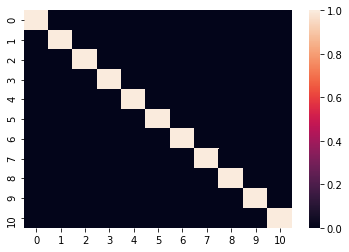

In [85]:
#zero correlation!
sns.heatmap(x1.corr())